In [83]:
import numpy as np
from PIL import Image
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [ ]:
# Load cguitar.tif from local machine into Colab instance
# Note: You only need to run this once
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [86]:
img = np.asarray(Image.open('cguitar.tif'))

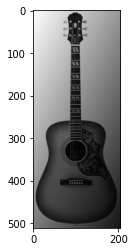

In [87]:
# Hint: Use the following lines to display an image
plt.imshow(img, cmap='gray')
plt.show()

In [89]:
# TODO: Compute least-squares estimate from selected corrupt pixels

A = np.ones((250*50,3)) # A = 12500x3
b = np.ones((250*50,1)) # b = 12500x1
ind = 0 
for y in range(250): # y < 250
    for x in range(50): # x < 50
        b[ind] = img[y][x] # value from corupt image
        A[ind][0] = x 
        A[ind][1] = y
        ind += 1

# Least Squares Estimation
At = np.matrix.transpose(A) # A'
AtA = np.matmul(At,A) # A'A
AtAinv = np.linalg.inv(AtA) #(A'A)^-1
q = np.matmul(np.matmul(AtAinv,At),b)
#print(q)

# Extract a,b,c from q
a = q[0][0]
b = q[1][0]
c = q[2][0]



In [90]:
# TODO: Undo the image corruption
rows, cols = img.shape # shape of image
print(img.shape)
f = np.zeros((rows,cols)) # f(x,y) image
for y in range(rows):
    for x in range(cols):
        f[y][x] = a*x + b*y +c

real_img = np.divide(img, f) #divide Ec by f(x,y) to get E


(511, 205)


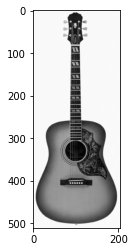

In [91]:
# TODO: Display the uncorrupted image
plt.imshow(real_img, cmap='gray')
plt.show()